# Named Entity Recognition

In [1]:
# ---------------------------------------------------------------------------- #
#                               Imports and setup                              #
# ---------------------------------------------------------------------------- #


# pandas
import pandas as pd

# seaborn
import seaborn as sns
sns.set_palette('Reds')

# numpy
import numpy as np

# matplotlib
import matplotlib.pyplot as plt
from matplotlib.axes._axes import _log as matplotlib_axes_logger

plt.rcParams["figure.figsize"] = (16, 10)
matplotlib_axes_logger.setLevel('ERROR')

# parse dataset
%run "src/generate_detailed_stats.py"

words_count_data, entities_count_data, entity_types_count_data, max_length = collect_stats(
    "entity-tag"
)

In [2]:
words_count = pd.DataFrame.from_dict(words_count_data, orient="index").sort_values(0, ascending=False).reset_index()
words_count.columns = ["Word", "Count"]

entities_count = pd.DataFrame.from_dict(entities_count_data, orient="index").sort_values(0, ascending=False).reset_index()
entities_count.columns = ["Id", "Count"]
entity_type_codes = [id.split(":")[1] for id in entities_count["Id"]]
entities = [id.split(":")[0] for id in entities_count["Id"]]
entities_count["Type"] = entity_type_codes
entities_count["Entity"] = entities
entities_count.drop(columns=["Id"], inplace=True)
entities_count.sort_values(['Type', 'Count'], inplace=True)
entities_count = entities_count[["Type", "Entity", "Count"]]

entity_types_count = pd.DataFrame.from_dict(entity_types_count_data, orient="index").sort_values(0, ascending=False).reset_index()
entity_types_count.columns = ["Entity Type", "Count"]

## Words

### Word occurences

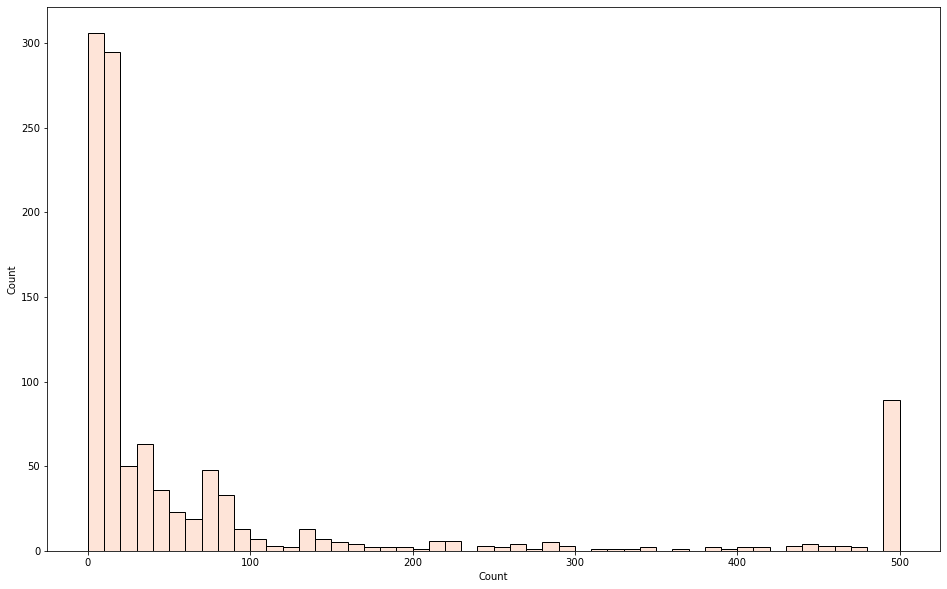

In [3]:
def plot_histplot():
    bins = np.arange(0, 510, 10)
    sns.histplot(data=np.clip(words_count["Count"], bins[0], bins[-1]), bins=bins)
    
plot_histplot()

In [4]:
words_count.select_dtypes("number").describe()

,Count
count,1081.000000
mean,169.685476
std,656.591532
min,1.000000
25%,6.000000
50%,16.000000
75%,74.000000
max,11474.000000


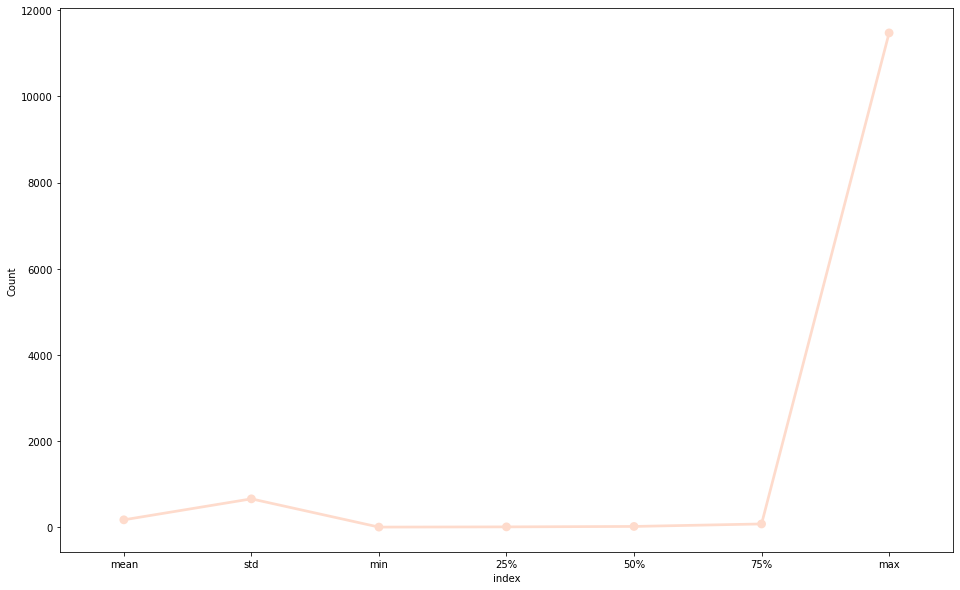

In [5]:
def plot_stats():
    stats = words_count.select_dtypes("number").describe()
    stats.reset_index(inplace=True)
    stats = stats[stats["index"] != "count"]
    
    for col in stats.columns[1:]:
        sns.pointplot(data=stats, x="index", y=col)
    
plot_stats()

In [6]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(words_count)

,Word,Count
0,តើ,11474
1,មាន,8732
2,នៅ,7589
3,ទេ,6457
4,បាន,4144
5,ប្រទេស,3530
6,ឬ,3352
7,ក្នុង,3114
8,ការ,2729
9,ណា,2638


## Entities

In [7]:
entity_types_count

,Entity Type,Count
0,GPE,4285
1,PER,3352
2,ORG,2535
3,EVE,1140
4,FLOOR,914
5,ROOM,793
6,MAJOR,497
7,BUILD,400
8,ANN,112
9,TIME,40


<AxesSubplot:xlabel='Entity Type', ylabel='Count'>

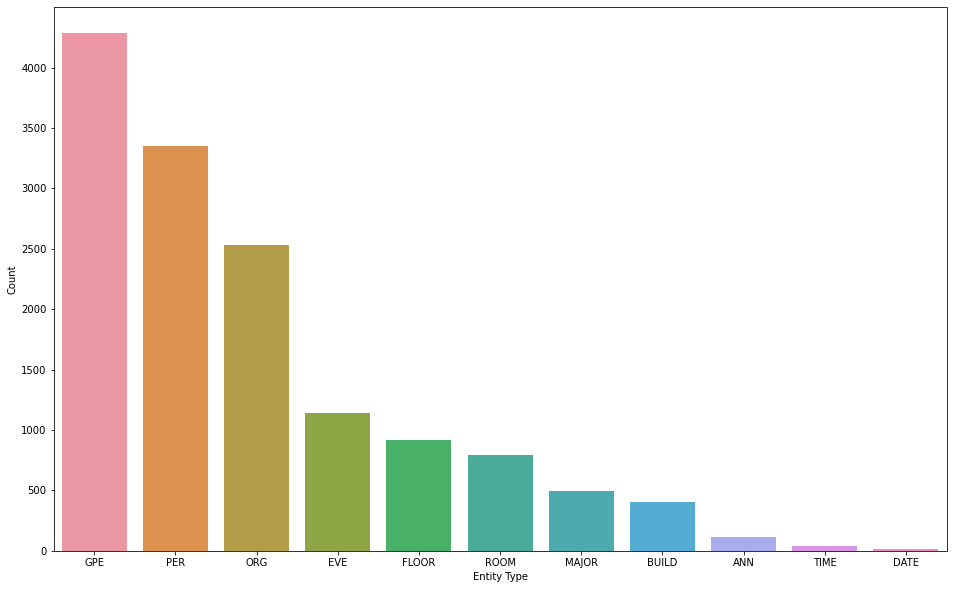

In [8]:
sns.barplot(data=entity_types_count, x="Entity Type", y="Count")

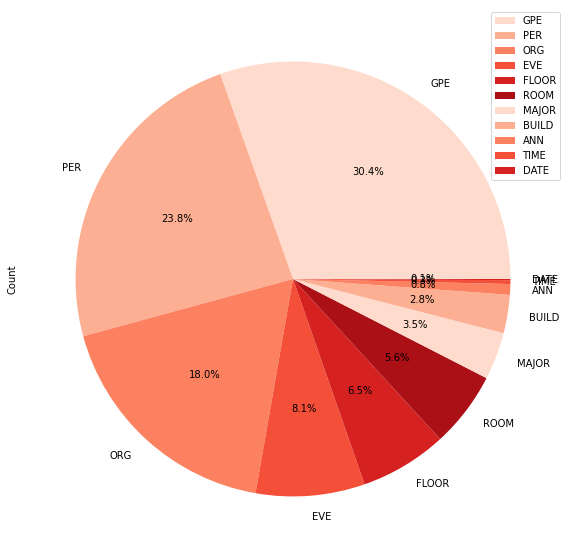

In [9]:
def plot_pieplot():
    entity_types_count.set_index("Entity Type").plot.pie(y="Count", autopct='%.1f%%')
    
plot_pieplot()

In [10]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(entities_count)

,Type,Entity,Count
78,ANN,អាហារូបករណ៍ទៅបារាំង,56
79,ANN,ការងារស្ម័គ្រចិត្ត,56
163,BUILD,អគាររតនៈ,27
164,BUILD,អគារស្មាត,27
165,BUILD,អគារមិត្តហ្វូន,27
166,BUILD,អគារវឌ្ឍនៈ,27
167,BUILD,អគារបុរី,27
168,BUILD,អគារសែលកាត,27
100,BUILD,អគារនវានុវត្តន៍,40
64,BUILD,អគារInnovationCenter,66


In [11]:
entities_count.groupby('Type').agg({"Count": ['mean', 'sum', 'median', 'min', 'max', 'count']})

Count                             
             mean   sum median  min  max count
Type                                          
ANN     56.000000   112   56.0   56   56     2
BUILD   40.000000   400   27.0   27   66    10
DATE     2.000000    12    2.0    2    2     6
EVE    228.000000  1140  228.0  228  228     5
FLOOR   70.307692   914   98.0    6  155    13
GPE     18.234043  4285   12.0    1   87   235
MAJOR   49.700000   497   52.0   15   63    10
ORG     27.857143  2535   35.0    1  281    91
PER     27.032258  3352   18.0    3  130   124
ROOM    33.041667   793   33.0    1   54    24
TIME    10.000000    40   10.0   10   10     4

<AxesSubplot:xlabel='Type', ylabel='Count'>

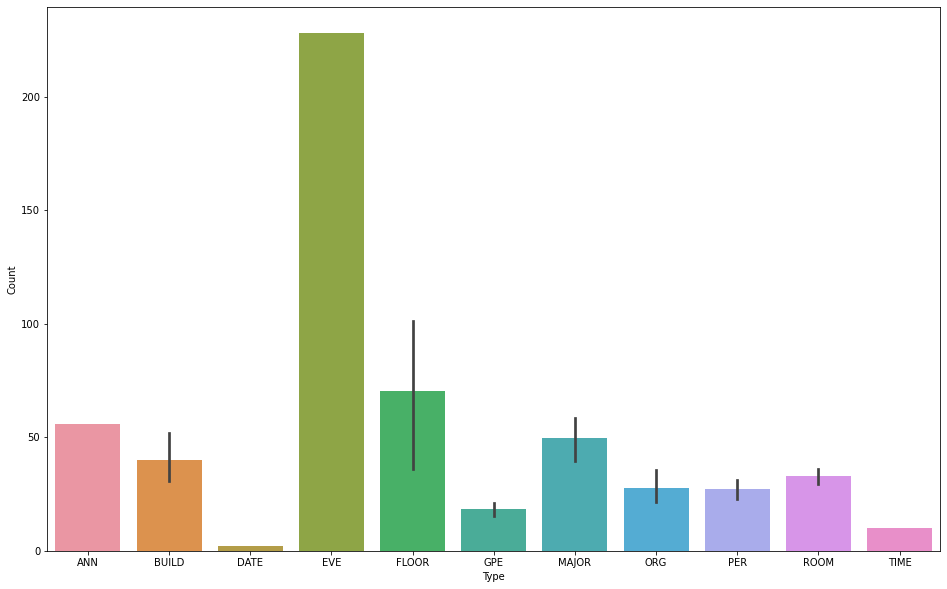

In [12]:
sns.barplot(data=entities_count, x="Type", y="Count")